# Rain

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import statsmodels.api as sm

In [98]:
#Load the dataset
df = pd.read_csv('weather.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [99]:
# Choose the column
column_name = 'MaxTemp'

In [100]:
# Drop NA values to avoid issues with calculations
data = df['MaxTemp'].dropna()

In [101]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Mean

In [102]:
mean_value = df['MaxTemp'].mean()
print(f"Mean: {mean_value}")

Mean: 23.22134827564685


# Median

In [103]:
median_value = df['MaxTemp'].median()
print(f"Median: {median_value}")

Median: 22.6


# Mode

In [104]:
mode_value = df['MaxTemp'].mode()
print(f"Mode: {mode_value}")

Mode: 0    20.0
Name: MaxTemp, dtype: float64


# Quartiles and Interquartile Range(IQR)

In [105]:
# Quartiles and Interquartile Range (IQR) 

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

Q1 (25th percentile): 17.9
Q3 (75th percentile): 28.2
IQR: 10.3


# Outliers (using 1.5 * IQR rule)

In [106]:
# Outliers (using 1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data < lower_bound) | (data > upper_bound)]
print(f"Outliers:\n{outliers}")

Outliers:
68        44.8
2904      43.7
4457      45.8
5885      45.1
5890      44.4
          ... 
144530    43.8
144535    44.0
144572    43.7
144858    43.7
144891    44.1
Name: MaxTemp, Length: 489, dtype: float64


# Standard Deviation

In [107]:
std_dev = df['MaxTemp'].std()
print(f"Standard Deviation: {std_dev}")

Standard Deviation: 7.119048845979134


 # Variance

In [108]:
# Variance
variance_value = data.var()
print(f"Variance: {variance_value}")

Variance: 50.680856471436826


# Normalization

In [109]:
normalized_column = (df['MaxTemp'] - df['MaxTemp'].min()) / (df['MaxTemp'].max() - df['MaxTemp'].min())
print(f"Normalized Column:\n{normalized_column}")

Normalized Column:
0         0.523629
1         0.565217
2         0.576560
3         0.620038
4         0.701323
            ...   
145455    0.533081
145456    0.568998
145457    0.599244
145458    0.601134
145459         NaN
Name: MaxTemp, Length: 145460, dtype: float64


# Box Plot

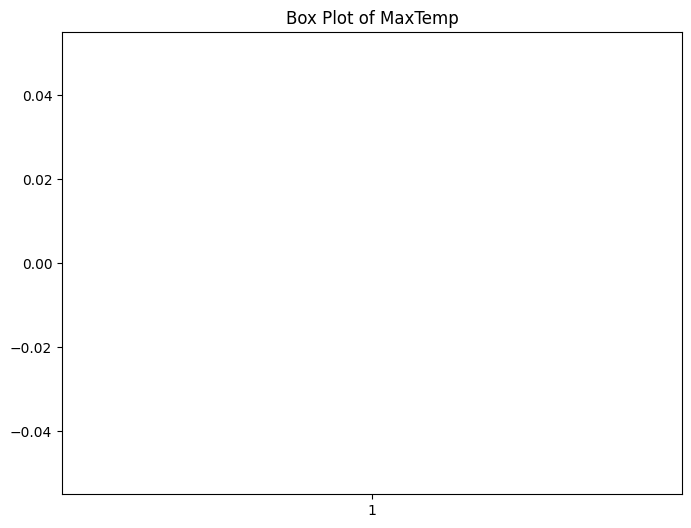

In [110]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['MaxTemp'])
plt.title(f'Box Plot of {'MaxTemp'}')
plt.show()

# Calculate skewness

In [111]:
skewness_value = skew(df['MaxTemp'].dropna())
print(f"Skewness: {skewness_value}")


Skewness: 0.220837050892215


# Plot histogram to visualize

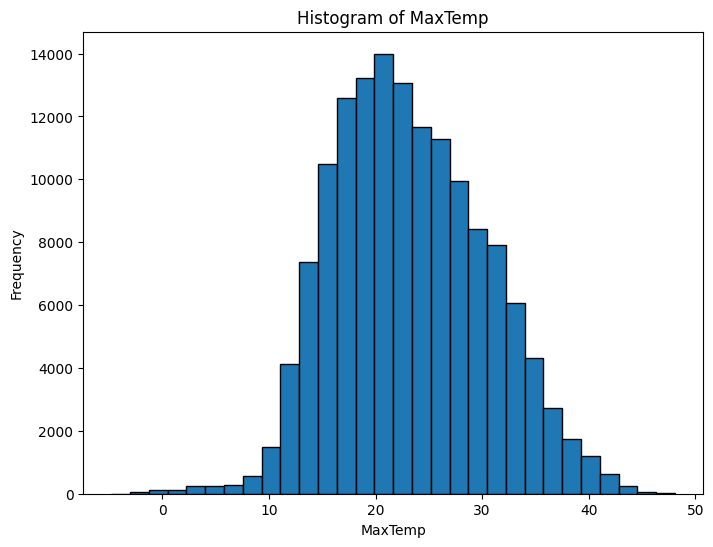

In [112]:
plt.figure(figsize=(8, 6))
plt.hist(df['MaxTemp'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'MaxTemp'}')
plt.xlabel('MaxTemp')
plt.ylabel('Frequency')
plt.show()

# Quartile Plot (Violin Plot)

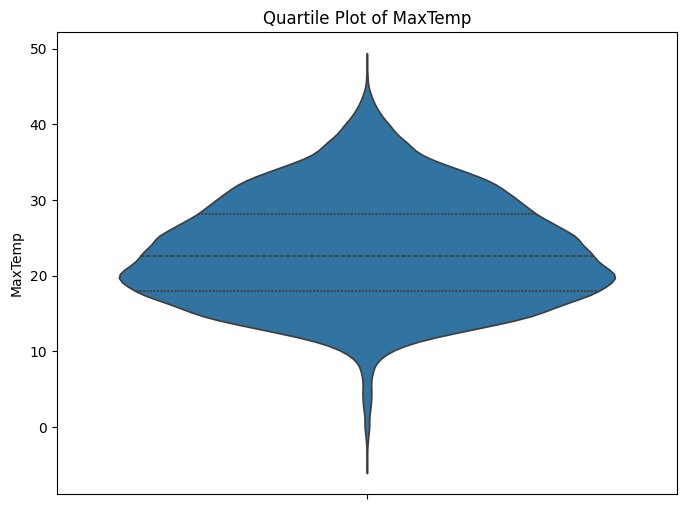

In [113]:
# Quartile Plot (Violin Plot)
plt.figure(figsize=(8, 6))
sns.violinplot(data, inner="quartile")
plt.title(f'Quartile Plot of {'MaxTemp'}')
plt.show()

# Quartile-Quartile (QQ) Plot

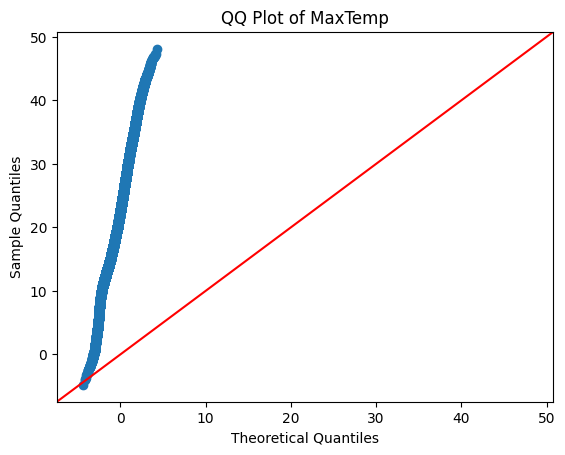

In [114]:
# Quartile-Quartile (QQ) Plot
sm.qqplot(data, line='45')
plt.title(f'QQ Plot of {'MaxTemp'}')
plt.show()

# Scatter Plot (against index)

ValueError: x and y must be the same size

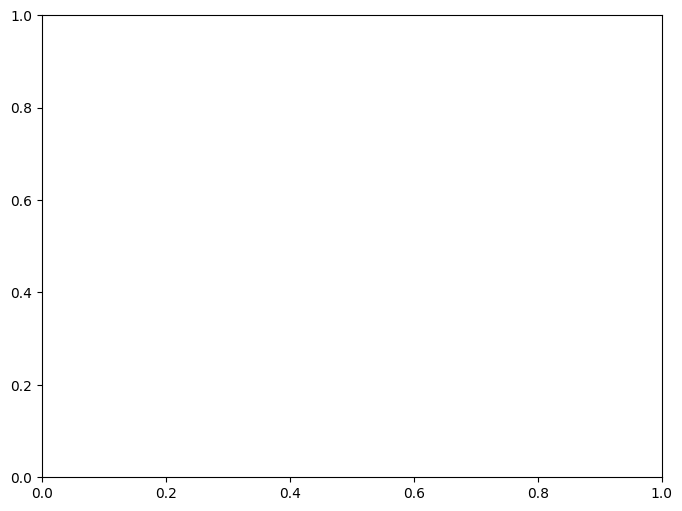

In [115]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, data)
plt.title(f'Scatter Plot of {'MaxTemp'}')
plt.xlabel('Index')
plt.ylabel('MaxTemp')
plt.show()
